# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
'''
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False
'''
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### 데이터 셋 읽어오기

In [3]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [4]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [6]:
df_train._get_numeric_data().columns

Index(['bant_submit', 'com_reg_ver_win_rate', 'customer_idx',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'lead_desc_length', 'ver_cus', 'ver_pro',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'lead_owner', 'is_converted'],
      dtype='object')

In [7]:
cols = df_train.columns
numcols = list(df_train._get_numeric_data().columns) # target이 포함되어 있음
target = 'is_converted'
catcols = list(set(cols)-set(numcols))
numcols.remove(target)
display(numcols, catcols)

['bant_submit',
 'com_reg_ver_win_rate',
 'customer_idx',
 'historical_existing_cnt',
 'id_strategic_ver',
 'it_strategic_ver',
 'idit_strategic_ver',
 'lead_desc_length',
 'ver_cus',
 'ver_pro',
 'ver_win_rate_x',
 'ver_win_ratio_per_bu',
 'lead_owner']

['business_unit',
 'product_category',
 'response_corporate',
 'customer_country.1',
 'customer_type',
 'product_subcategory',
 'product_modelname',
 'customer_job',
 'expected_timeline',
 'business_subarea',
 'customer_position',
 'enterprise',
 'inquiry_type',
 'business_area',
 'customer_country']

In [8]:
# display([df_train[column].unique() for column in catcols]) # 데이터가 너무 많아서 보기 힘듬

for column in catcols:
    print(column)
    print()
    print(df_train[column].unique())
    print()

business_unit

['AS' 'ID' 'IT' 'Solution' 'CM']

product_category

['multi-split' 'single-split' 'vrf' 'chiller' 'etc.' 'rac'
 'teto ou cassete inverter' nan 'software solution' 'all lg vrf systems'
 'ventilation' 'a thermodynamic water heater'
 'residential air conditioner' 'outros' 'heating' 'multi v5 vrf'
 'split tunggal' 'multi inverter' 'חימום' 'standard signage'
 'high brightness signage' 'interactive signage' 'video wall signage'
 'led signage' 'hotel tv' 'signage care solution' 'oled signage' 'idb'
 'video wall' 'one:quick series' 'commercial tv' 'lg one:quick'
 'special signage' 'other' 'accessories' 'commercial display'
 'interactive digital board' 'standard' 'uhd signage' 'smart tv signage'
 'lg one:quick series' 'pro:centric' 'ur640' 'ur640s' 'webos'
 'signage care solutions' 'aio | one quick' 'high brightness'
 'hospital tv' 'digital signage' 'monitor' 'pc' 'laptop' 'projector'
 'cloud device' 'medical display' 'washing machine,dryer' 'solar,chiller'
 'system ac,rac' 'moni

## 수치형 데이터 시각화

In [9]:
df_train['id_strategic_ver'] = df_train['id_strategic_ver'].fillna(0)
df_train['it_strategic_ver'] = df_train['it_strategic_ver'].fillna(0)
df_train['idit_strategic_ver'] = df_train['idit_strategic_ver'].fillna(0)

In [10]:
for column in numcols:
    print(column)
    print()
    print(df_train[column].unique())
    print()

bant_submit

[1.   0.75 0.5  0.25 0.  ]

com_reg_ver_win_rate

[0.06666667 0.08888889 0.04081633 0.00393701        nan 0.05753425
 0.075      0.04464286 0.08433735 0.0199005  0.07494867 0.04347826
 0.03119584 0.14705882 0.03305785 0.08069164 0.33333333 0.04310345
 0.11627907 0.01351351 0.04854369 0.01818182 0.01185771 0.21428571
 0.3902439  0.03225806 0.01754386 0.03278689 0.05555556 0.01515152
 0.46153846 0.06818182 0.08333333 0.26923077 0.18181818 0.23076923
 0.64285714 0.16666667 0.01724138 0.05389222 0.04968944 0.01098901
 0.06779661 0.03703704 0.00378788 0.36363636 0.10526316 0.61538462
 0.08695652 0.05442177 0.05319149 0.07142857 0.04       0.04166667
 0.02892562 0.11842105 0.04918033 0.11864407 0.07324841 0.02898551
 0.01960784 0.02272727 0.004      0.125      0.01694915 0.12412178
 0.13636364 0.02020202 0.11363636 0.03603604 0.06956522 0.5
 1.         0.25       0.44444444 0.025      0.83333333 0.04761905
 0.4        0.04225352 0.2       ]

customer_idx

[32160 23122  1755 ... 

In [11]:
numcols

['bant_submit',
 'com_reg_ver_win_rate',
 'customer_idx',
 'historical_existing_cnt',
 'id_strategic_ver',
 'it_strategic_ver',
 'idit_strategic_ver',
 'lead_desc_length',
 'ver_cus',
 'ver_pro',
 'ver_win_rate_x',
 'ver_win_ratio_per_bu',
 'lead_owner']

 'id_strategic_ver', 'it_strategic_ver','idit_strategic_ver','ver_cus', 'ver_pro' 는 수치형으로 분리되었지만, 값이 0과 1만 가진다.

In [12]:
pair= ['bant_submit',
 'com_reg_ver_win_rate',
 'customer_idx',
 'historical_existing_cnt',
 'lead_desc_length',
 'ver_win_rate_x',
 'ver_win_ratio_per_bu',
 'lead_owner', 
      'is_converted']
# sns.pairplot(df_train[pair], hue = 'is_converted') # 딱히 의미가 없어보인다. 

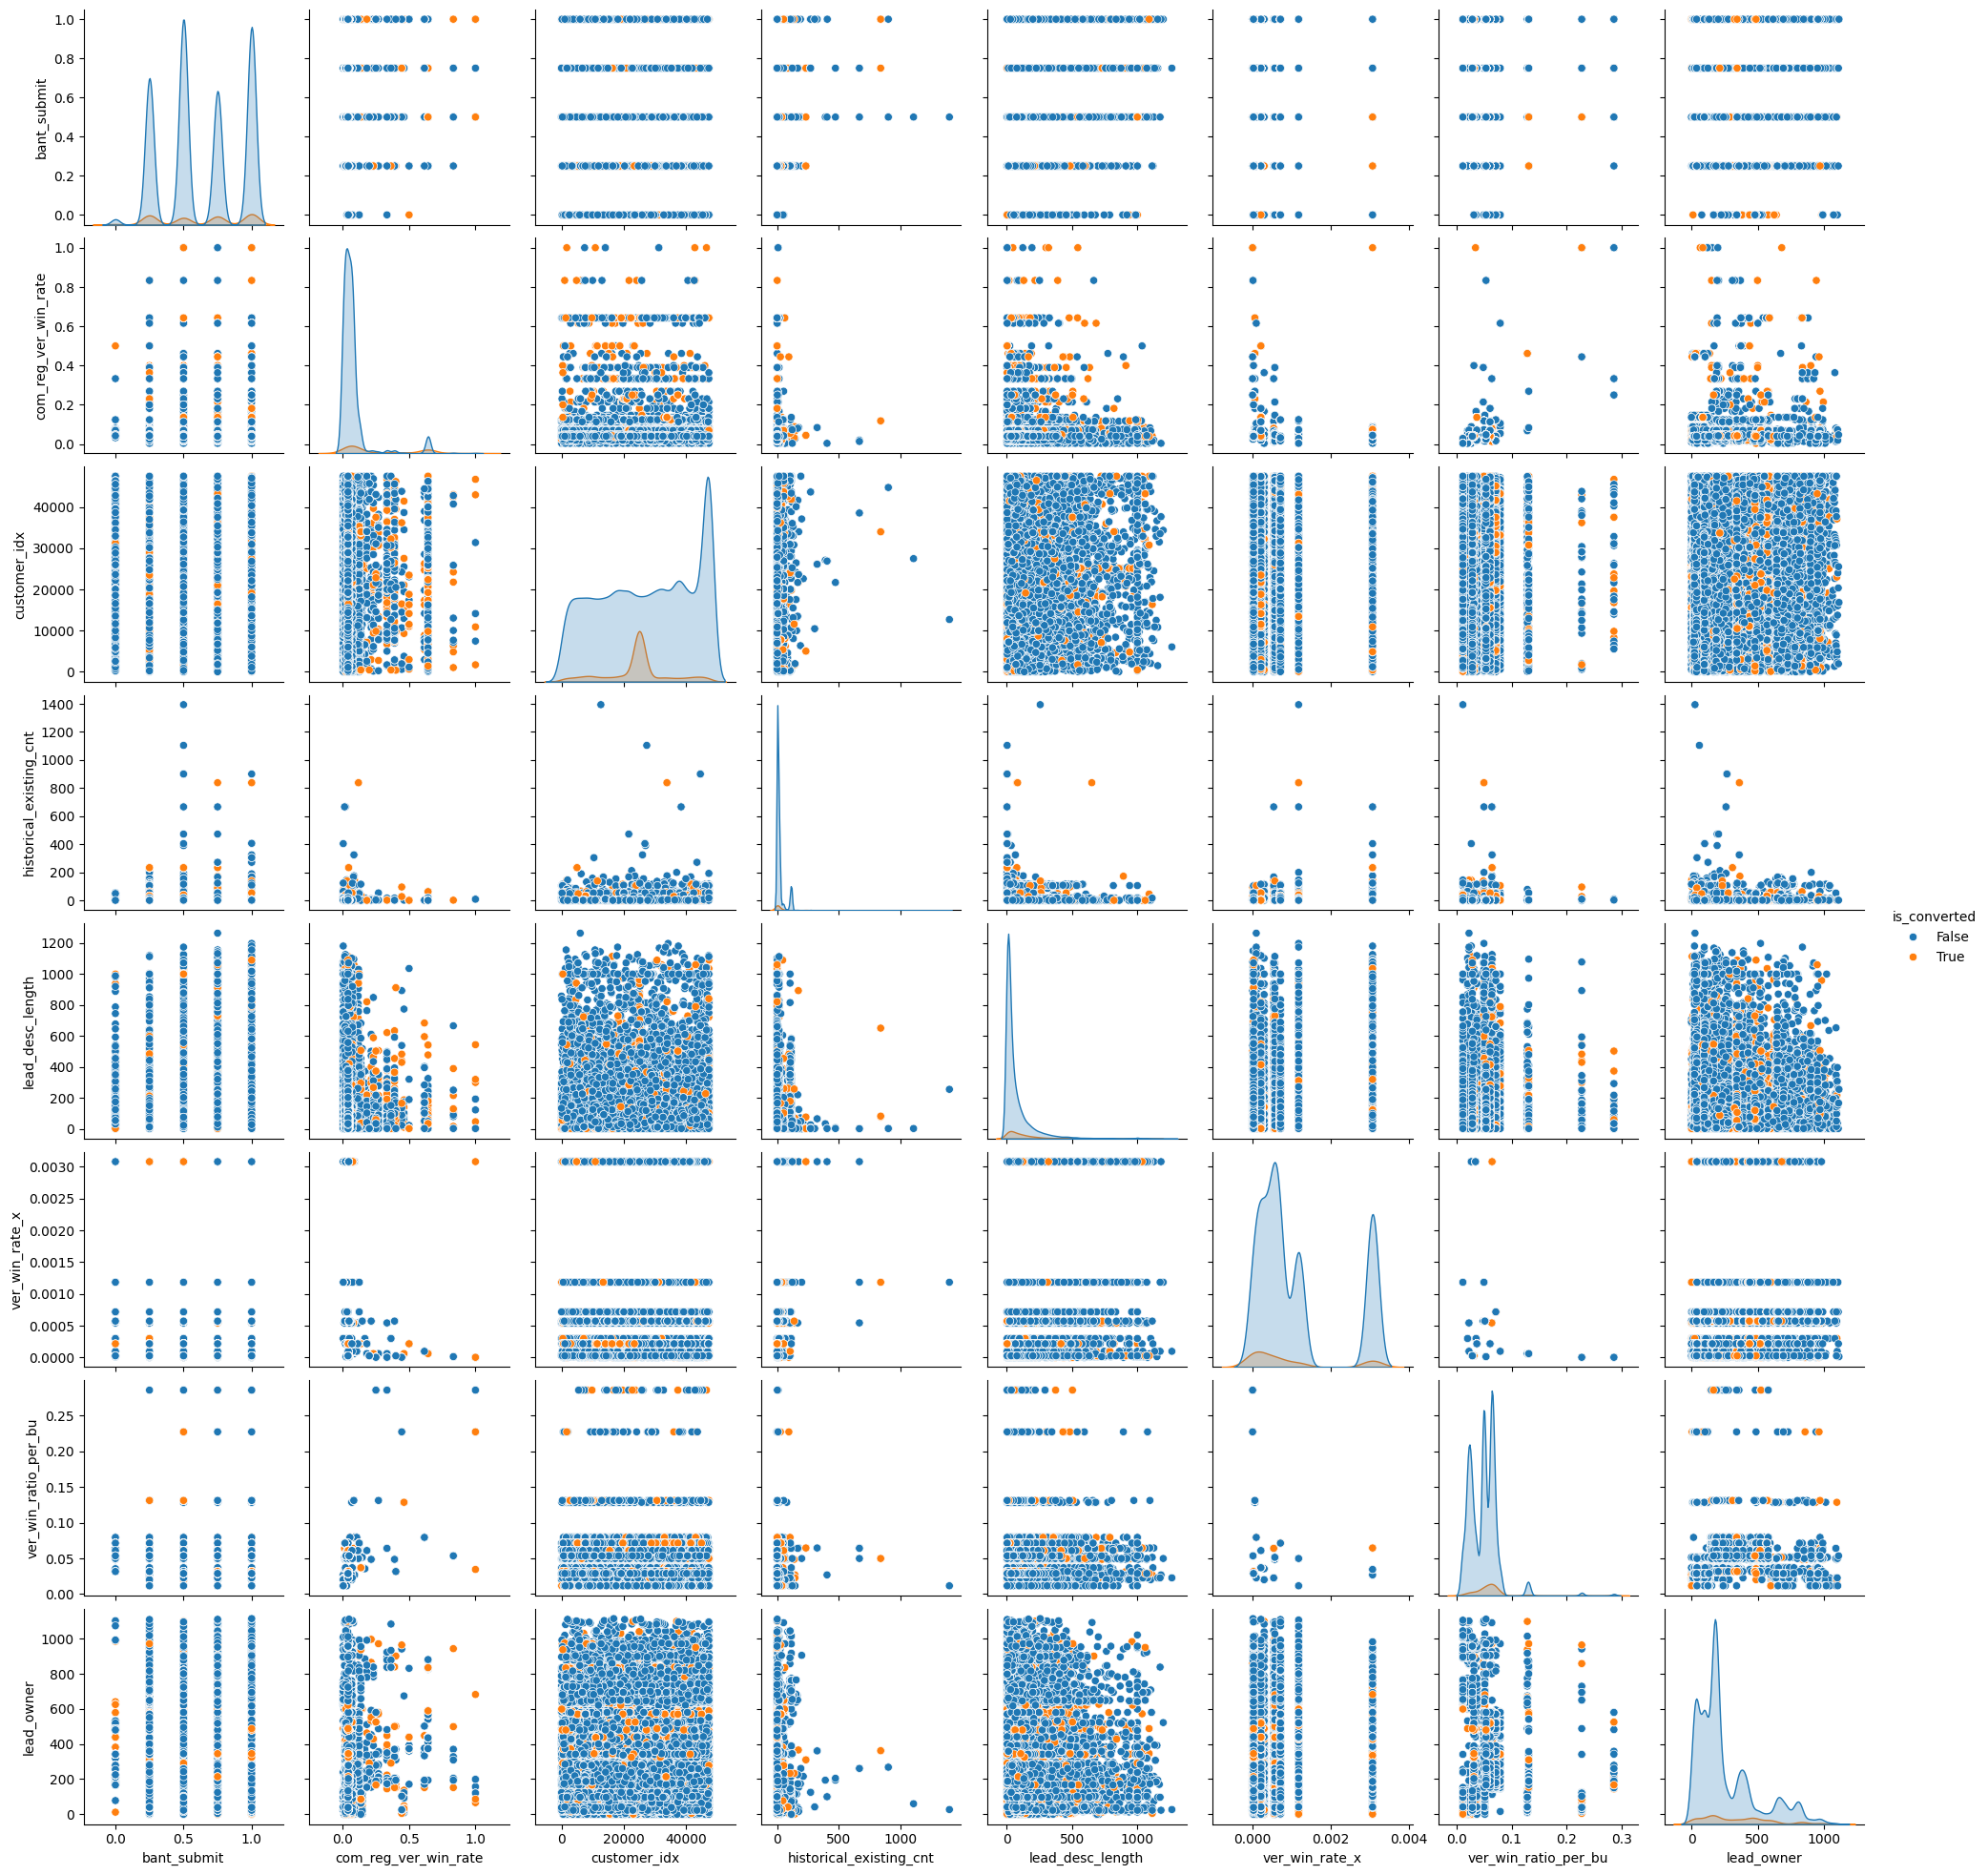

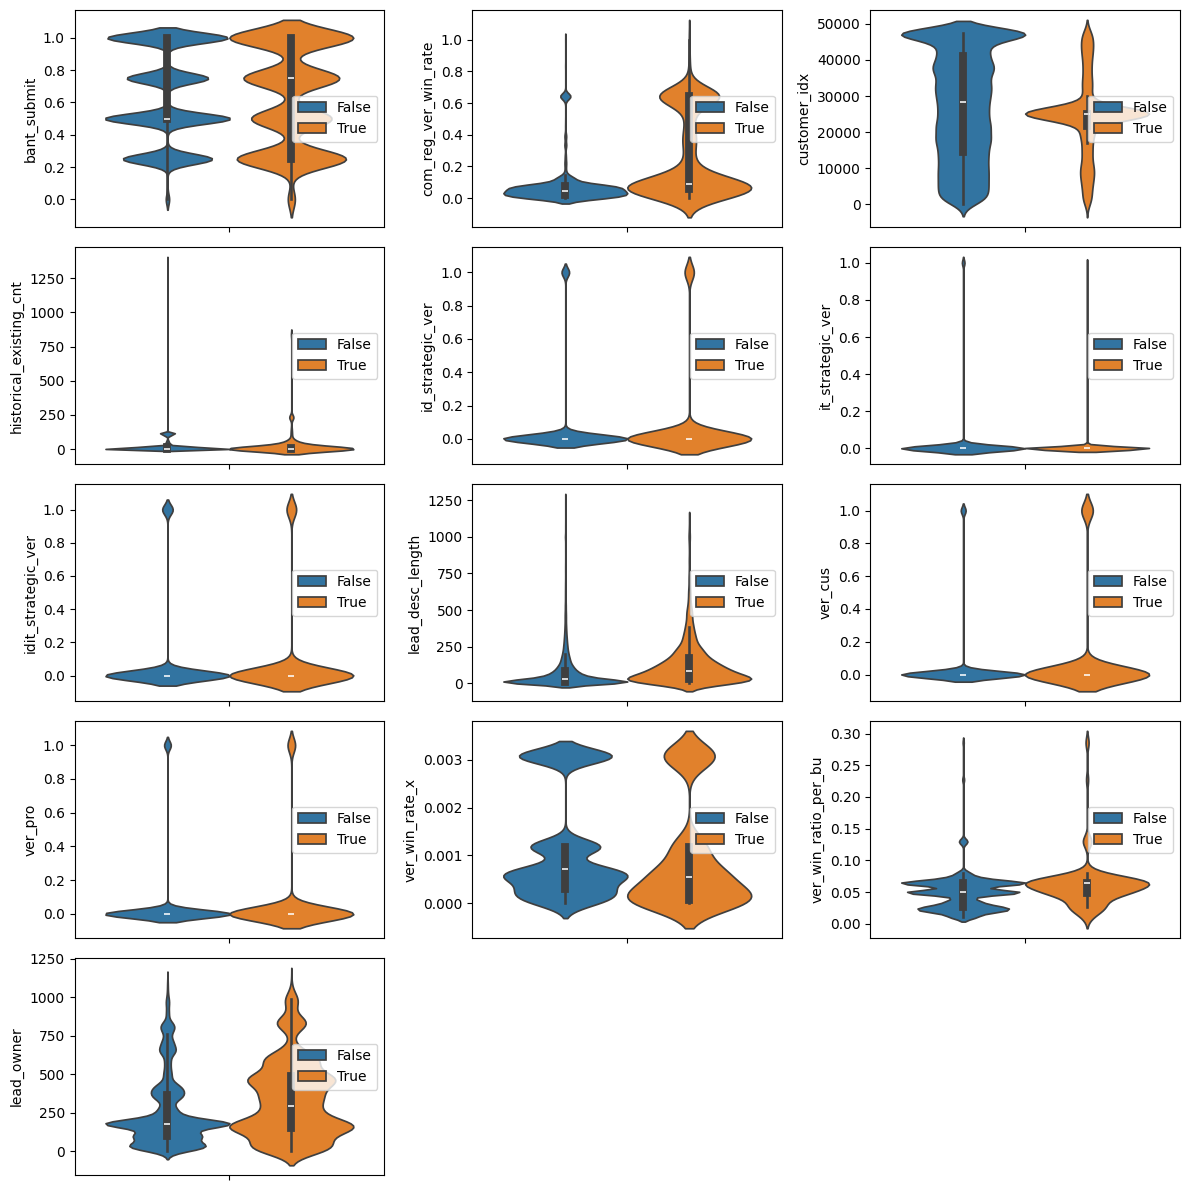

In [13]:
plt.figure(figsize=(12,12))
for idx, feature in enumerate(numcols):
    plt.subplot(5,3,idx+1)
    sns.violinplot(y=numcols[idx], hue = target, data = df_train)
    plt.legend(loc='center right')
plt.tight_layout()
plt.show()

- True와 False에서 차이가 나는 것 같아 보이는건, 
    - bant_submit : True 값이 더 높은 평균을 가지고 있다. 즉, 실제 구매로 이어진 고객들은 예산, 고객의 직책, 요구사항, 희망 납기일에 대해서 작성된 값의 비율이 높다.
    - com_reg_ver_win_rate: 회사에 등록된 고객 중에 실제로 거래를 완료한 비율 -> True값에서 더 높은 값들이 보인다.
    - custom_idx를 보면, 구매했던 고객들이 계속 구매하는 것 같아보인다. 
    - lead_desc_length: 구매로 이어진 고객들의 설명이 더 긴 것을 알 수 있다 -> 평균 차이로 feature engineering할 수는 없을까? 
    - lead_owner : 영업 담당자의 이름인데, 우수 영업 사원이 있다는 건가.... ㅎ

In [14]:
print(df_train.groupby(target)['com_reg_ver_win_rate'].describe())

                count      mean       std       min       25%       50%  \
is_converted                                                              
False         13302.0  0.075727  0.125106  0.003788  0.019608  0.047619   
True           1266.0  0.259350  0.259115  0.003788  0.057534  0.088889   

                   75%  max  
is_converted                 
False         0.074949  1.0  
True          0.642857  1.0  


In [15]:
print(df_train.groupby(target)['lead_desc_length'].describe())

                count        mean         std  min   25%   50%     75%     max
is_converted                                                                  
False         54449.0   74.808371  129.702727  1.0   6.0  27.0   84.00  1264.0
True           4850.0  129.378351  152.401538  1.0  30.0  81.5  170.75  1114.0


 'id_strategic_ver', 'it_strategic_ver','idit_strategic_ver','ver_cus', 'ver_pro' 는 수치형으로 분리되었지만, 값이 0과 1만 가진다.

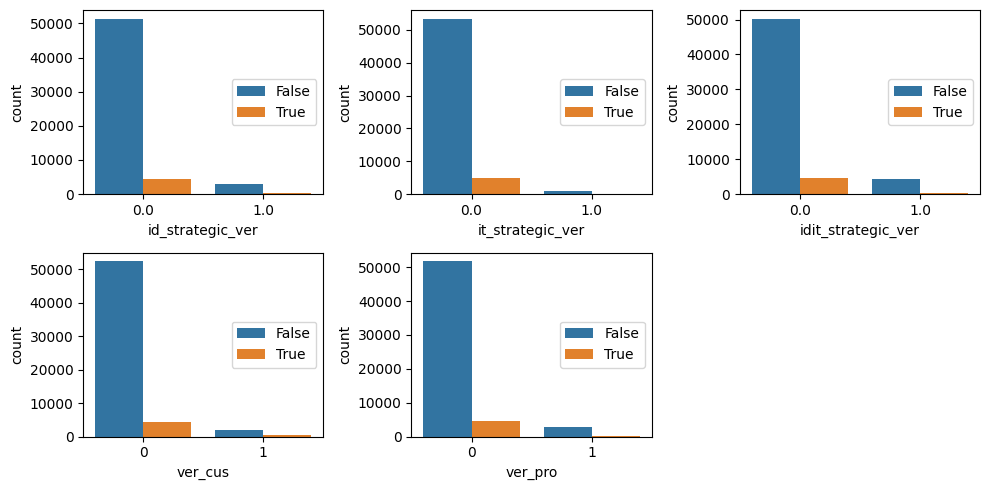

In [16]:
binary_num = ['id_strategic_ver', 'it_strategic_ver','idit_strategic_ver','ver_cus', 'ver_pro']
plt.figure(figsize=(10,5))
for idx, feature in enumerate(binary_num):
    plt.subplot(2,3,idx+1)
    sns.countplot(x=binary_num[idx], hue = target, data = df_train)
    plt.legend(loc='center right')
plt.tight_layout()
plt.show()

위의 변수 모두 크게 영향을 미치는지 모르겠다

## 2. 데이터 전처리

### 레이블 인코딩

In [17]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [18]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

다시 학습 데이터와 제출 데이터를 분리합니다.

In [19]:
for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

### 2-2. 학습, 검증 데이터 분리

In [20]:
# ! pip install imbalanced-learn

In [21]:
from imblearn.under_sampling import RandomUnderSampler

# Random Undersampling 적용
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(df_train.drop("is_converted", axis=1),df_train["is_converted"])

In [22]:
x_train, x_val, y_train, y_val = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## feature selection

In [23]:
# !pip install mlxtend

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV, SequentialFeatureSelector
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from xgboost import XGBClassifier

kf = StratifiedKFold(shuffle = True, random_state = True)
model_xgb = XGBClassifier(random_state = 42)
selector = SFS(model_xgb, k_features=(3, 28), forward=True, floating=True, scoring = 'f1', cv = kf)
#selector = SequentialFeatureSelector(estimator = model_xgb, cv = kf, scoring = 'f1', direction = 'forward')
#selector = RFECV(estimator = model_xgb, step=1, cv = kf, scoring = 'f1')
selector = selector.fit(x_train,y_train)

In [40]:
selector.subsets_

{1: {'feature_idx': (27,),
  'cv_scores': array([0.8038624 , 0.81463112, 0.805     , 0.84041898, 0.79898862]),
  'avg_score': 0.8125802246528112,
  'feature_names': ('lead_owner',)},
 2: {'feature_idx': (4, 27),
  'cv_scores': array([0.88988476, 0.89087428, 0.89145793, 0.90247074, 0.89399745]),
  'avg_score': 0.8937370328112311,
  'feature_names': ('customer_idx', 'lead_owner')},
 3: {'feature_idx': (4, 5, 27),
  'cv_scores': array([0.92081737, 0.91943734, 0.90326714, 0.92357513, 0.91830272]),
  'avg_score': 0.9170799396947829,
  'feature_names': ('customer_idx', 'customer_type', 'lead_owner')},
 4: {'feature_idx': (4, 5, 19, 27),
  'cv_scores': array([0.91994917, 0.91933419, 0.92620865, 0.92903226, 0.93154191]),
  'avg_score': 0.9252132354145,
  'feature_names': ('customer_idx',
   'customer_type',
   'response_corporate',
   'lead_owner')},
 5: {'feature_idx': (4, 5, 12, 19, 27),
  'cv_scores': array([0.92834496, 0.93170103, 0.92268695, 0.93136626, 0.94095238]),
  'avg_score': 0.9310

In [44]:
# selector.support_
sfs_selected=['bant_submit',
   'business_unit',
   'com_reg_ver_win_rate',
   'customer_idx',
   'customer_type',
   'enterprise',
   'historical_existing_cnt',
   'id_strategic_ver',
   'it_strategic_ver',
   'idit_strategic_ver',
   'customer_job',
   'lead_desc_length',
   'inquiry_type',
   'product_category',
   'product_subcategory',
   'product_modelname',
   'customer_country.1',
   'customer_position',
   'response_corporate',
   'expected_timeline',
   'ver_cus',
   'ver_pro',
   'ver_win_ratio_per_bu',
   'business_area',
   'business_subarea',
   'lead_owner']

In [45]:
features_selected = sfs_selected
#features_selected = x_train.columns[selector.support_].to_list()
print(features_selected)

['bant_submit', 'business_unit', 'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job', 'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory', 'product_modelname', 'customer_country.1', 'customer_position', 'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea', 'lead_owner']


In [46]:
train_selected = x_train[features_selected]
valid_selected = x_val[features_selected]

In [47]:
cv_result_selected = cross_validate(model_xgb, train_selected, y_train, cv=kf, scoring='f1')

# 'test_score'의 평균 계산
mean_test_score = np.mean(cv_result_selected['test_score'])

print("Mean test score:", mean_test_score)

Mean test score: 0.9361267215274063


In [48]:
cv_result_selected

{'fit_time': array([0.22582603, 0.21011233, 0.20205021, 0.15762925, 0.12564278]),
 'score_time': array([0.011796  , 0.01065874, 0.01117301, 0.0069654 , 0.00698495]),
 'test_score': array([0.93044033, 0.93982074, 0.92952381, 0.94064516, 0.94020356])}

In [49]:
list(set(cols)-set(features_selected))

['ver_win_rate_x', 'customer_country', 'is_converted']

drop_feature = {'RFECV 제거 변수' : 
['customer_position',
 'customer_country.1',
 'is_converted',
 'ver_cus',
 'idit_strategic_ver',
 'ver_pro'],

'Sklearn SFS 제거 변수(backward)' :['expected_timeline',
 'id_strategic_ver',
 'business_area',
 'ver_win_rate_x',
 'customer_position',
 'customer_country.1',
 'customer_country',
 'is_converted',
 'ver_cus',
 'business_unit',
 'idit_strategic_ver',
 'ver_pro',
 'it_strategic_ver',
 'ver_win_ratio_per_bu',
 'enterprise']           
 }
pd.DataFrame(drop_feature)

## 3. 모델 학습

### 모델 정의 

In [50]:
# model = DecisionTreeClassifier() # undersampling-> 0.53 : 0.85

from sklearn.ensemble import RandomForestClassifier # 0.63 : 0.91
from xgboost import XGBClassifier # 0.73: 0.93

# model = RandomForestClassifier(random_state = 42)
model = XGBClassifier(random_state = 42)

### 모델 학습

In [51]:
model.fit(train_selected.fillna(0), y_train)
# model.fit(x_train.fillna(0), y_train) # original

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### 모델 성능 보기

In [52]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [53]:
pred = model.predict(valid_selected.fillna(0))
# pred = model.predict(x_val.fillna(0)) # original
get_clf_eval(y_val, pred)

오차행렬:
 [[911  55]
 [ 79 895]]

정확도: 0.9309
정밀도: 0.9202
재현율: 0.9431
F1: 0.9315


## feature importance 확인

In [54]:
valid_selected.columns

Index(['bant_submit', 'business_unit', 'com_reg_ver_win_rate', 'customer_idx',
       'customer_type', 'enterprise', 'historical_existing_cnt',
       'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver',
       'customer_job', 'lead_desc_length', 'inquiry_type', 'product_category',
       'product_subcategory', 'product_modelname', 'customer_country.1',
       'customer_position', 'response_corporate', 'expected_timeline',
       'ver_cus', 'ver_pro', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea', 'lead_owner'],
      dtype='object')

In [55]:
from xgboost import plot_importance

fscore = model.get_booster().get_fscore()
fscore

{'bant_submit': 61.0,
 'business_unit': 47.0,
 'com_reg_ver_win_rate': 118.0,
 'customer_idx': 414.0,
 'customer_type': 163.0,
 'enterprise': 42.0,
 'historical_existing_cnt': 57.0,
 'id_strategic_ver': 10.0,
 'it_strategic_ver': 3.0,
 'idit_strategic_ver': 1.0,
 'customer_job': 169.0,
 'lead_desc_length': 334.0,
 'inquiry_type': 106.0,
 'product_category': 152.0,
 'product_subcategory': 72.0,
 'product_modelname': 55.0,
 'customer_country.1': 304.0,
 'customer_position': 131.0,
 'response_corporate': 231.0,
 'expected_timeline': 57.0,
 'ver_cus': 3.0,
 'ver_pro': 4.0,
 'ver_win_ratio_per_bu': 57.0,
 'business_area': 56.0,
 'business_subarea': 86.0,
 'lead_owner': 537.0}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

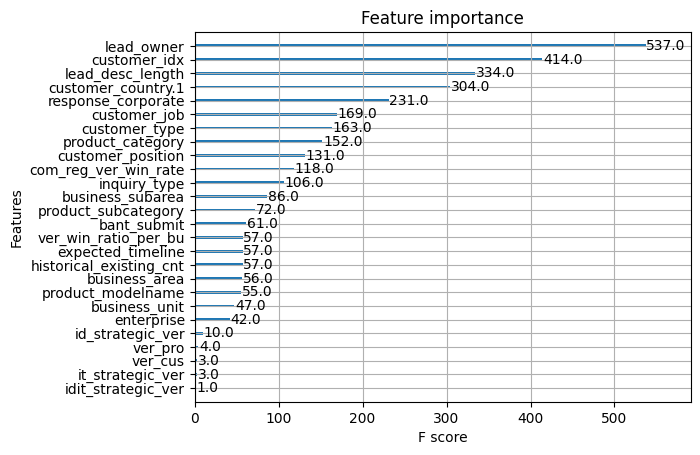

In [56]:
plot_importance(model)

## 4. 제출하기

### 테스트 데이터 예측

In [57]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id"], axis=1)
test_selected = x_test[features_selected]

In [58]:
test_pred = model.predict(test_selected.fillna(0))
sum(test_pred) # True로 예측된 개수

1837

### 제출 파일 작성

In [ ]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**